In [1]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# make this notebook's output stable across runs
np.random.seed(0)

In [2]:
filename = 'animalscsv.csv'
df = pd.read_csv(filename)
df.head()

,1. animal name:,2. hair,3. feathers,4. eggs,5. milk,6. airborne,7. aquatic,8. predator,9. toothed,10. backbone,11. breathes,12. venomous,13. fins,14. legs,15. tail,16. domestic,17. catsize,18. type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [3]:
df.shape

(101, 18)

In [4]:
df.dtypes

1. animal name:    object
2. hair              bool
3. feathers          bool
4. eggs              bool
5. milk              bool
6. airborne          bool
7. aquatic           bool
8. predator          bool
9. toothed           bool
10. backbone         bool
11. breathes         bool
12. venomous         bool
13. fins             bool
14. legs            int64
15. tail             bool
16. domestic         bool
17. catsize          bool
18. type           object
dtype: object

In [5]:
df.isnull().sum()

1. animal name:    0
2. hair            0
3. feathers        0
4. eggs            0
5. milk            0
6. airborne        0
7. aquatic         0
8. predator        0
9. toothed         0
10. backbone       0
11. breathes       0
12. venomous       0
13. fins           0
14. legs           0
15. tail           0
16. domestic       0
17. catsize        0
18. type           0
dtype: int64

In [6]:
numeric_columns = df.columns.to_list()
numeric_columns.remove('1. animal name:')
numeric_columns.remove('18. type')
df[numeric_columns] = df[numeric_columns].astype(int)

In [134]:
numeric_columns

['2. hair',
 '3. feathers',
 '4. eggs',
 '5. milk',
 '6. airborne',
 '7. aquatic',
 '8. predator',
 '9. toothed',
 '10. backbone',
 '11. breathes',
 '12. venomous',
 '13. fins',
 '14. legs',
 '15. tail',
 '16. domestic',
 '17. catsize']

In [7]:
df.head()

,1. animal name:,2. hair,3. feathers,4. eggs,5. milk,6. airborne,7. aquatic,8. predator,9. toothed,10. backbone,11. breathes,12. venomous,13. fins,14. legs,15. tail,16. domestic,17. catsize,18. type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal


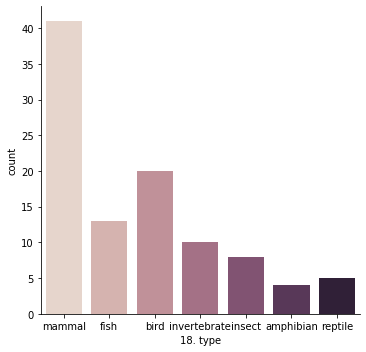

In [8]:
import seaborn as sns
sns.catplot(x='18. type', kind="count", palette="ch:.1", data=df)

In [9]:
df['18. type'].value_counts()

mammal          41
bird            20
fish            13
invertebrate    10
insect           8
reptile          5
amphibian        4
Name: 18. type, dtype: int64

In [13]:
len(df['1. animal name:'].unique())

100

In [10]:
df["2. hair"].value_counts()

0    58
1    43
Name: 2. hair, dtype: int64

-----------------

In [18]:
option = df[df["2. hair"] == 1]
option['18. type'].value_counts()

mammal    39
insect     4
Name: 18. type, dtype: int64

In [80]:
yei = option['18. type'].value_counts()

In [86]:
yei['mammal']

39

In [79]:
option_1 = df[df["2. hair"] == 0]
option_1['18. type'].value_counts()

bird            20
fish            13
invertebrate    10
reptile          5
insect           4
amphibian        4
mammal           2
Name: 18. type, dtype: int64

In [130]:
def split_data(dataframe, variable):
    #Category 1
    df1 = dataframe[dataframe[variable] == 1]
    count = df1['18. type'].value_counts()
    value = 0
    for i in count:
        value += i
    proba_1 = []
    for i in count:
        p = (i/value)**2
        proba_1.append(p)
    sum1 = sum(proba_1)
    gini1 = 1 - sum1
    
    #Category 0
    df0 = dataframe[dataframe[variable] == 0]
    count0 = df0['18. type'].value_counts()
    value0 = 0
    for i in count0:
        value0 += i
    proba_0 = []
    for i in count0:
        p0 = (i/value0)**2
        proba_0.append(p0)
    sum0 = sum(proba_0)
    gini0 = 1 - sum0
    
    gini_summary = [gini0, gini1]
    indexes = [0, 1]
    
    #Total Gini index
    res = {indexes[i]: gini_summary[i] for i in range(len(indexes))}
    size = value0 + value1
    total_gini = value1/size*gini1 + value0/size*gini0
    
    return total_gini, res

In [135]:
numeric_columns.remove('14. legs')

In [143]:
total_gini_list = []
dictionaries = []
for i in numeric_columns:
    total_gini, res = split_data(df, i)
    total_gini_list.append(total_gini)
    dictionaries.append(res)

final_gini_values = {numeric_columns[i]: total_gini_list[i] for i in range(len(numeric_columns))}
final_gini_values

{'2. hair': 0.5214812579894718,
 '3. feathers': 0.4486260454002389,
 '4. eggs': 0.44270143564464,
 '5. milk': 0.4572815533980582,
 '6. airborne': 0.6155318061568062,
 '7. aquatic': 0.6935824891843411,
 '8. predator': 0.7456735724592867,
 '9. toothed': 0.5787660720819316,
 '10. backbone': 0.6162105793640029,
 '11. breathes': 0.6075662667410714,
 '12. venomous': 0.7455897177419355,
 '13. fins': 0.5982208538811542,
 '15. tail': 0.6923445559271646,
 '16. domestic': 0.7058214832730394,
 '17. catsize': 0.6667085326953748}

### Gini index for Numerical columns

In [107]:
# df1 = df[df["2. hair"] == 1]
# count1 = df1['18. type'].value_counts()
# value1 = 0
# index_1 = count1.index.tolist()
# proba_1 = []
# for i in count1:
#     value1 += i      
# for i in count1:
#     p = (i/value1)**2
#     proba_1.append(p)
# sum1 = sum(proba_1)
# gini1 = 1 - sum1
# gini1

#****************************************

# df0 = df[df["2. hair"] == 0]
# count0 = df0['18. type'].value_counts()
# value0 = 0
# index_0 = count0.index.tolist()
# proba_0 = []
# for i in count0:
#     value0 += i      
# for i in count0:
#     p0 = (i/value0)**2
#     proba_0.append(p0)
# sum0 = sum(proba_0)
# gini0 = 1 - sum0
# gini0

0.1687398593834506

------------------